### Dimensionality Reduction 
#### DCA Testing
Testing Deep Count Autoencoder (DCA) on *GSE102698ClosenessRep_0.hdf5* example data  
https://github.com/theislab/dca  
  
Ran from command line as follows:  
`dca little_test_labels.csv results`

In [1]:
import tSNE_utils # load utility functions from local file

import numpy as np
import pandas as pd

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'whitegrid')
%matplotlib inline

Get original data

In [10]:
%%time
#load the hdf5 files into objects
r00 = tSNE_utils.read_hdf5("inputs/GSE102698ClosenessRep_0.hdf5")

CPU times: user 2.51 s, sys: 494 ms, total: 3 s
Wall time: 3.08 s


Get output from DCA

In [13]:
reduced = np.genfromtxt('DCA_results/reduced.tsv')

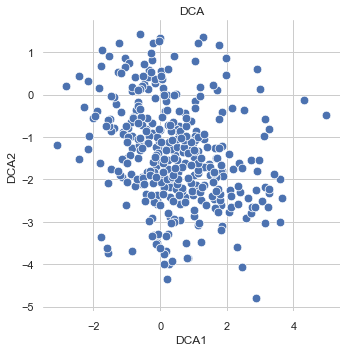

In [15]:
plt.figure(figsize=(5,5))
sns.scatterplot(reduced[:,1],reduced[:,3],s=75)
plt.title('DCA')
plt.xlabel('DCA1')
plt.ylabel('DCA2')

sns.despine(left=True, bottom=True)
plt.tight_layout()

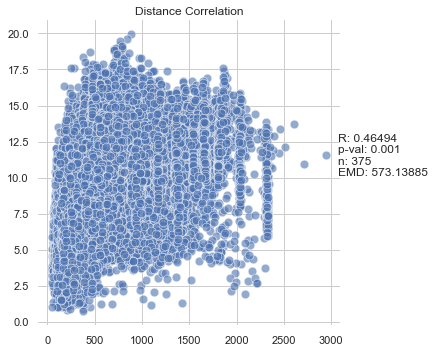

(0.4649402697862487, 0.001, 375)

In [11]:
tSNE_utils.compare_euclid(r00['Close_0.00'], reduced[:,1:])